In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder


In [2]:
# import data
df_all = pd.read_csv(r"C:\Users\vance\Desktop\project_folder\df_clean.csv", index_col=0)

In [3]:
# vectorizing list, then classify
comment_list = df_all['comments'].to_list()
vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
X = vectorizer.fit_transform(comment_list)
# sparsity score
print(f"{X.nnz / np.prod(X.shape):.3f}")

0.005


In [4]:
# to df
Xdf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
Xdf['review_id'] = df_all['review_id']

Xdf

,00,10,100,1000,10am,10min,11,11pm,12,13,...,zimmer,zona,zoo,zu,zum,zur,était,été,좋았습니다,review_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098676e+18
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.205221e+18
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.083519e+18
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.263867e+18
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.245033e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.770984e+08
12662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.419088e+08
12663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.180423e+17
12664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.277628e+18


In [10]:
# Target variable, word top or sentiment score
Xdf_without_id = Xdf.loc[:, Xdf.columns != 'review_id']

# Sum the TF-IDF scores
df_all['tfidf_sum'] = Xdf_without_id.sum(axis=1)

# Find the most important word per review (ignoring 'review_id')
df_all['top_word'] = Xdf_without_id.idxmax(axis=1)

# sentiment score, will update here:
# se = df_sentiment_imported(axis=1)

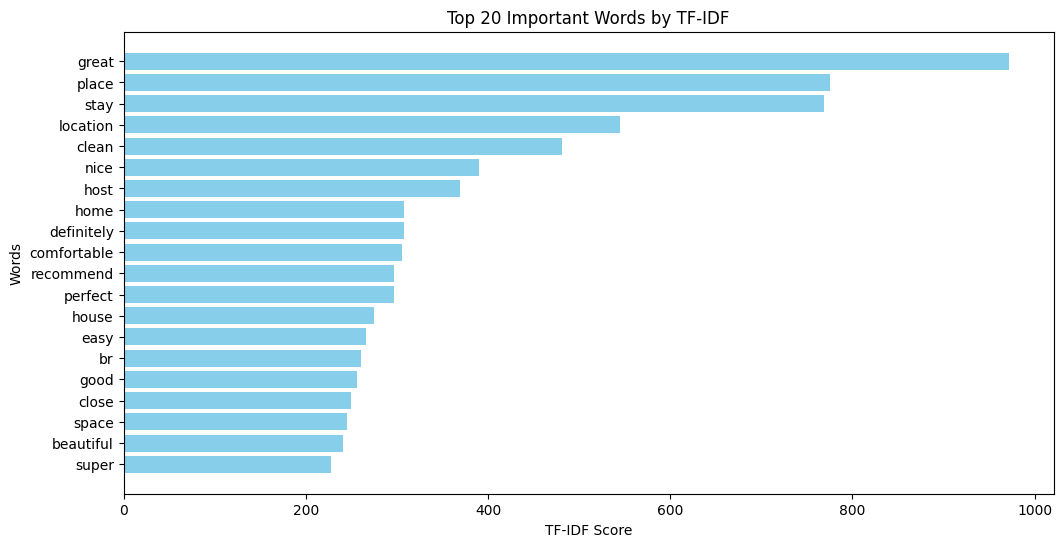

In [16]:
# Sum the TF-IDF scores for each word across all reviews
tfidf_scores = np.asarray(X.sum(axis=0)).flatten()

# Create a DataFrame with words and their corresponding TF-IDF scores
word_tfidf_df = pd.DataFrame(list(zip(Xdf, tfidf_scores)), columns=['word', 'tfidf_score'])

# Sort the DataFrame by TF-IDF score in descending order
top_words_df = word_tfidf_df.sort_values(by='tfidf_score', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_words_df['word'][::-1], top_words_df['tfidf_score'][::-1], color='skyblue')
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title(f"Top {top_n} Important Words by TF-IDF")
plt.show()

In [ ]:
# export feature df
Xdf.to_csv(r"C:\Users\vance\Desktop\project_folder\Xdf_features.csv")
word_tfidf_df.to_csv(r"C:\Users\vance\Desktop\project_folder\Xdf_top.csv")

In [19]:
# Split datasets for cross-validation
# tw=top_word, ts=tfidf_sum, se=sentiment
tw_train, tw_test = train_test_split(df_all['top_word'], test_size=0.2, random_state=42)
ts_train, ts_test = train_test_split(df_all['tfidf_sum'], test_size=0.2, random_state=42)
# X_train, X_test, se_train, se_test = train_test_split(X, se, test_size=0.2, random_state=42)

In [ ]:
# Export to CSV
tw_train_with_id = pd.concat([tw_train, df_all.loc[tw_train.index, 'review_id']], axis=1)
tw_train_with_id.to_csv(r"C:\Users\vance\Desktop\project_folder\data\tw_train.csv", index=False)

tw_test_with_id = pd.concat([tw_test, df_all.loc[tw_test.index, 'review_id']], axis=1)
tw_test_with_id.to_csv(r"C:\Users\vance\Desktop\project_folder\data\tw_test.csv", index=False)

ts_train_with_id = pd.concat([ts_train, df_all.loc[ts_train.index, 'review_id']], axis=1)
ts_train_with_id.to_csv(r"C:\Users\vance\Desktop\project_folder\data\ts_train.csv", index=False)

ts_test_with_id = pd.concat([ts_test, df_all.loc[ts_test.index, 'review_id']], axis=1)
ts_test_with_id.to_csv(r"C:\Users\vance\Desktop\project_folder\data\ts_test.csv", index=False)

r""" # Exporting the train and test features (X) with review_id
X_train_df_with_id = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_train_df_with_id['review_id'] = df_all.loc[X_train.index, 'review_id']
X_train_df_with_id.to_csv(r"C:\Users\vance\Desktop\project_folder\data\X_train.csv", index=False)

X_test_df_with_id = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())
X_test_df_with_id['review_id'] = df_all.loc[X_test.index, 'review_id']
X_test_df_with_id.to_csv(r"C:\Users\vance\Desktop\project_folder\data\X_test.csv", index=False)

# Sentiment scores with review_id
se_train_with_id = pd.concat([se_train, df_all.loc[se_train.index, 'review_id']], axis=1)
se_train_with_id.to_csv(r"C:\Users\vance\Desktop\project_folder\data\se_train.csv", index=False)

se_test_with_id = pd.concat([se_test, df_all.loc[se_test.index, 'review_id']], axis=1)
se_test_with_id.to_csv(r"C:\Users\vance\Desktop\project_folder\data\se_test.csv", index=False) """

' # Exporting the train and test features (X) with review_id\nX_train_df_with_id = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())\nX_train_df_with_id[\'review_id\'] = df_all.loc[X_train.index, \'review_id\']\nX_train_df_with_id.to_csv(r"C:\\Users\\vance\\Desktop\\project_folder\\data\\X_train.csv", index=False)\n\nX_test_df_with_id = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())\nX_test_df_with_id[\'review_id\'] = df_all.loc[X_test.index, \'review_id\']\nX_test_df_with_id.to_csv(r"C:\\Users\\vance\\Desktop\\project_folder\\data\\X_test.csv", index=False)\n\n# Sentiment scores with review_id\nse_train_with_id = pd.concat([se_train, df_all.loc[se_train.index, \'review_id\']], axis=1)\nse_train_with_id.to_csv(r"C:\\Users\\vance\\Desktop\\project_folder\\data\\se_train.csv", index=False)\n\nse_test_with_id = pd.concat([se_test, df_all.loc[se_test.index, \'review_id\']], axis=1)\nse_test_with_id.to_csv(r"C:\\Users\\vance\\Desktop\\pr

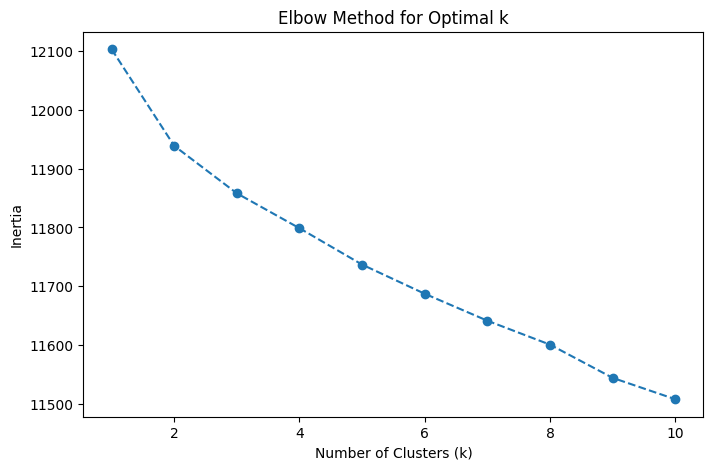

In [25]:
# clustering elbow
# Compute inertia for different cluster sizes
inertia = []
k_range = range(1, 11)  # Testing k=1 to k=10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)  # X is your TF-IDF matrix or sentiment data
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


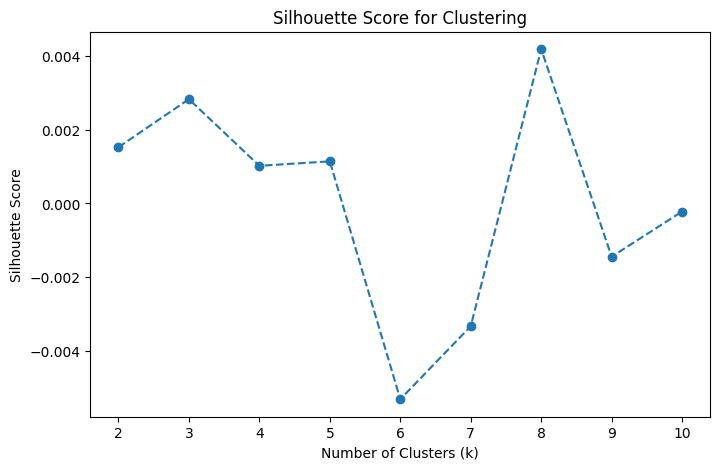

In [26]:
# cluster scores
sil_scores = []
for k in range(2, 11):  # k must be at least 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Clustering")
plt.show()

In [27]:
# above, highest sil score k=8
# k-means
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df_all["cluster"] = clusters

# Check cluster distribution
df_all["cluster"].value_counts()

cluster
4    6467
5    2296
6    1074
0     681
7     647
3     633
2     513
1     355
Name: count, dtype: int64

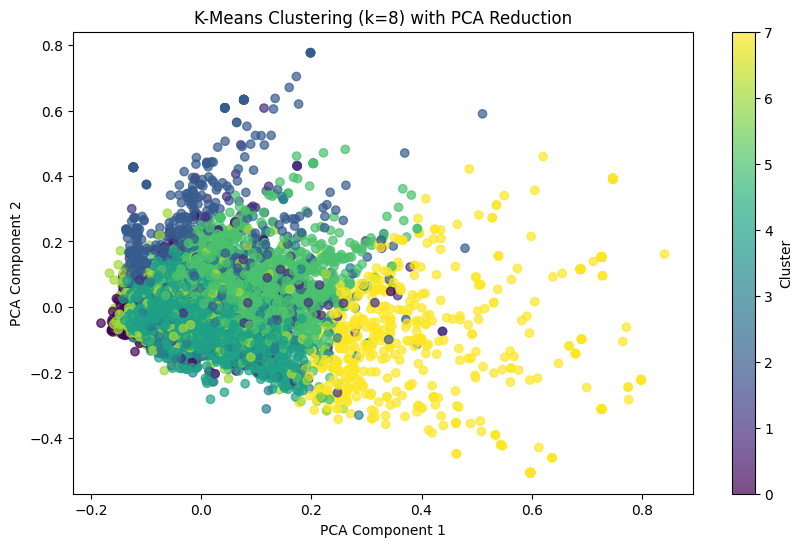

In [ ]:
# PCA vis
# Reduce TF-IDF dimensions to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (k=8) with PCA Reduction")
plt.colorbar(scatter, label="Cluster")
plt.show()
# shows not well separated without incorporating other data

In [ ]:
# Get cluster centers in original TF-IDF space
terms = vectorizer.get_feature_names_out()
cluster_keywords = {}

for i in range(8):
    top_terms = np.argsort(kmeans.cluster_centers_[i])[-10:]  # Top 10 words per cluster
    cluster_keywords[i] = [terms[j] for j in top_terms[::-1]]

# Display top words per cluster
for cluster, words in cluster_keywords.items():
    print(f"Cluster {cluster}: {', '.join(words)}")
# not significant words correlation

Cluster 0: br, great, place, stay, clean, location, comfortable, house, host, nice
Cluster 1: good, place, location, stay, great, clean, nice, value, host, communication
Cluster 2: nice, place, clean, stay, great, location, really, host, neighborhood, house
Cluster 3: convenient, excellent, location, stay, place, great, clean, host, comfortable, super
Cluster 4: great, location, place, clean, stay, house, perfect, easy, host, space
Cluster 5: stay, place, great, recommend, definitely, clean, enjoyed, highly, location, perfect
Cluster 6: home, beautiful, stay, felt, great, like, comfortable, clean, definitely, right
Cluster 7: great, place, location, stay, host, clean, hosts, house, definitely, spot


In [31]:
# sum of tfidf scores, points to review significance
tfidf_sum_values = df_all["tfidf_sum"].values.reshape(-1, 1)

# Apply K-Means with k=8
kmeans_tfidf_sum = KMeans(n_clusters=8, random_state=42, n_init=10)
df_all["cluster_tfidf_sum"] = kmeans_tfidf_sum.fit_predict(tfidf_sum_values)

# Check cluster distribution
df_all["cluster_tfidf_sum"].value_counts()

cluster_tfidf_sum
4    2490
0    2294
2    2126
6    1888
7    1439
3    1172
1     897
5     360
Name: count, dtype: int64

In [33]:
# Convert top words into categorical feature vectors
encoder = OneHotEncoder()
top_word_encoded = encoder.fit_transform(df_all[["top_word"]]).toarray()

# Apply K-Means with k=8
kmeans_top_word = KMeans(n_clusters=8, random_state=42, n_init=10)
df_all["cluster_top_word"] = kmeans_top_word.fit_predict(top_word_encoded)

# Check cluster distribution
df_all["cluster_top_word"].value_counts()

cluster_top_word
4    12266
2      193
7       88
1       43
6       37
3       20
5       12
0        7
Name: count, dtype: int64

In [ ]:
r""" # Fit K-Means on sentiment scores
kmeans_sentiment = KMeans(n_clusters=8, random_state=42, n_init=10)
df_all["sentiment_cluster"] = kmeans_sentiment.fit_predict(df_all[["sentiment_score"]])

# Check cluster distribution
df_all["sentiment_cluster"].value_counts() """
# add to all to see afterward how it compares

In [ ]:
df_all[["review_id", "cluster", "cluster_tfidf_sum", "cluster_top_word"]]
# still need to implement sentiment cluster
# will update with all data
# and figure out how to more streamlined train each with all the right features and scores combined, then apply to test

,review_id,cluster,cluster_tfidf_sum,cluster_top_word
0,1.098676e+18,6,3,4
1,1.205221e+18,5,2,4
2,1.083519e+18,5,2,4
3,1.263867e+18,5,6,4
4,1.245033e+18,4,1,4
...,...,...,...,...
12661,2.770984e+08,4,0,4
12662,1.419088e+08,4,7,4
12663,7.180423e+17,4,4,4
12664,1.277628e+18,5,0,4
